## KEDH EX: 08

#### Libraries

In [96]:
# import libraries
import pandas as pd
import numpy as np

#### Data

In [162]:
# load dataset
movies = pd.read_csv("C:/Users/Dell/Desktop/SoSe21/KEDH/Exercise/Ex8/ml-latest-small/movies.csv")
movies = movies.replace(0, np.NaN).dropna(axis=1)   # drop missing values
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
# load dataset
links =  pd.read_csv("C:/Users/Dell/Desktop/SoSe21/KEDH/Exercise/Ex8/ml-latest-small/links.csv")
links = links.replace(0, np.NaN).dropna(axis=1)  # drop missing values
links.head() 

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


In [52]:
# load dataset
ratings = pd.read_csv("C:/Users/Dell/Desktop/SoSe21/KEDH/Exercise/Ex8/ml-latest-small/ratings.csv")
ratings = ratings.replace(0, np.NaN).dropna(axis=1)   # drop missing values
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
# load dataset
tags = pd.read_csv("C:/Users/Dell/Desktop/SoSe21/KEDH/Exercise/Ex8/ml-latest-small/tags.csv")
tags = tags.replace(0, np.NaN).dropna(axis=1)   # drop missing values
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


#### Merge datasets

In [75]:
# merge datasets
mergedData_1 = pd.merge(movies,links,on="movieId")
mergedData_1.head()

,movieId,title,genres,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,113228
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885
4,5,Father of the Bride Part II (1995),Comedy,113041


In [79]:
# merge remaining datasets
mergedData_2 = pd.merge(ratings,tags, on=["movieId","userId"])
mergedData_2.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y
0,2,60756,5.0,1445714980,funny,1445714994
1,2,60756,5.0,1445714980,Highly quotable,1445714996
2,2,60756,5.0,1445714980,will ferrell,1445714992
3,2,89774,5.0,1445715189,Boxing story,1445715207
4,2,89774,5.0,1445715189,MMA,1445715200


In [150]:
# final dataset
movies_data = pd.merge(mergedData_1,mergedData_2, on="movieId").drop_duplicates()
movies_data = movies_data.drop(columns = ["imdbId","timestamp_x","timestamp_y"])
movies_data.head()

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,4.0,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,4.0,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,3.5,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,4.0,magic board game


In [151]:
# calculate and sort average rating of each movie 
movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
(500) Days of Summer (2009)                    5.0
Star Trek: First Contact (1996)                5.0
Dead Man Walking (1995)                        5.0
Spider-Man 2 (2004)                            5.0
South Park: Bigger, Longer and Uncut (1999)    5.0
Name: rating, dtype: float64

In [152]:
# calculate total number of rating for each movie
movies_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                                               181
Fight Club (1999)                                                  54
2001: A Space Odyssey (1968)                                       41
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     35
Big Lebowski, The (1998)                                           32
Name: rating, dtype: int64

In [164]:
# new data frame with average ratings and number of ratings 
ratings_mean_count = pd.DataFrame(movies_data.groupby('title')['rating'].mean())

# add the number of ratings for a movie to the above df
ratings_mean_count['rating_counts'] = pd.DataFrame(movies_data.groupby('title')['rating'].count())

ratings_mean_count.head()

,rating,rating_counts
title,,
(500) Days of Summer (2009),5.0,8
...And Justice for All (1979),2.5,1
10 Cloverfield Lane (2016),3.0,2
10 Things I Hate About You (1999),2.5,1
101 Dalmatians (1996),2.0,2


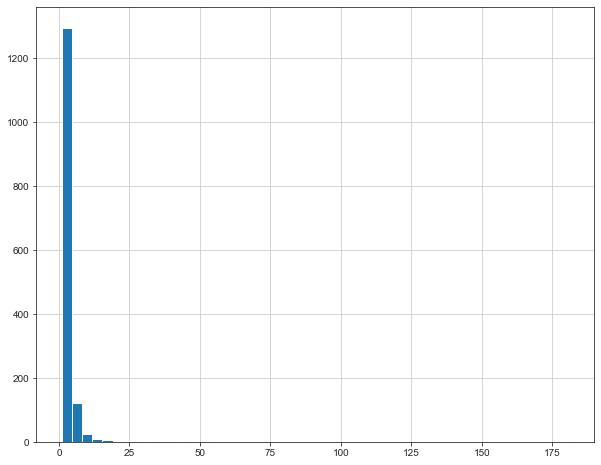

In [154]:
# plot the ratings count
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True

ratings_mean_count['rating_counts'].hist(bins=50) # most movies have received less than 25 ratings

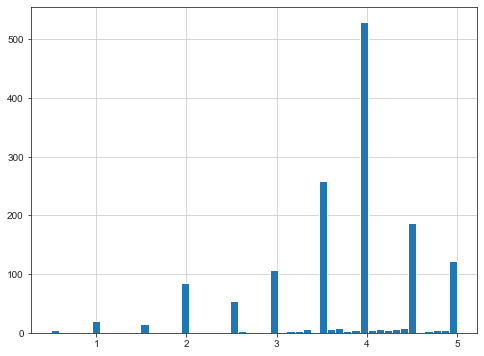

In [155]:
# plot average ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

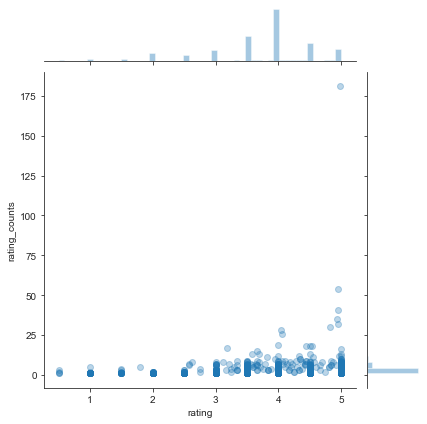

In [156]:
# plot rating count and avg movie rating
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.3)

In [159]:
# create matrix of movie titles and respective ratings
user_movie_rating = movies_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,(500) Days of Summer (2009),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),"11'09""01 - September 11 (2002)",12 Angry Men (1957),13 Going on 30 (2004),2001: A Space Odyssey (1968),...,Young Frankenstein (1974),Z (1969),Zack and Miri Make a Porno (2008),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zombieland (2009),Zoolander (2001),Zulu (1964),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
pulp_fiction_ratings = user_movie_rating['Pulp Fiction (1994)']
pulp_fiction_ratings.head(50)

userId
2      NaN
7      NaN
18     NaN
21     NaN
49     NaN
62     NaN
63     NaN
76     NaN
103    5.0
106    NaN
112    NaN
119    NaN
125    NaN
132    NaN
138    NaN
161    NaN
166    NaN
167    NaN
177    NaN
184    NaN
193    NaN
205    NaN
226    NaN
256    NaN
274    NaN
289    NaN
291    NaN
300    NaN
305    NaN
318    NaN
319    NaN
327    NaN
336    NaN
356    NaN
357    NaN
419    NaN
424    4.5
435    NaN
439    NaN
462    NaN
474    4.0
477    NaN
487    NaN
506    NaN
509    NaN
513    NaN
520    NaN
533    NaN
537    NaN
567    NaN
Name: Pulp Fiction (1994), dtype: float64

In [161]:
movies_like_pulp_fiction = user_movie_rating.corrwith(pulp_fiction_ratings)

corr_pulp_fiction = pd.DataFrame(movies_like_pulp_fiction, columns=['Correlation'])
corr_pulp_fiction.dropna(inplace=True)
corr_pulp_fiction.sort_values('Correlation', ascending=False).head(20) # sort the values

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Pulp Fiction (1994),1.0
"Big Lebowski, The (1998)",1.0
Fight Club (1999),1.0
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),1.0
2001: A Space Odyssey (1968),1.0
The Machinist (2004),1.0
"Shining, The (1980)",1.0
Seven (a.k.a. Se7en) (1995),1.0
Rosemary's Baby (1968),1.0
